In [1]:
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0;
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[0])) 
        self.L=2
        self.dims = [3,2,2,2,1] 
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[0]
        self.threshold=0.5
        
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.full((self.dims[1], self.dims[0]),0.5) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.full((self.dims[2], self.dims[1]),0.7) 
        self.param['b2'] = np.zeros((self.dims[2], 1))
        self.param['W3'] = np.full((self.dims[3], self.dims[2]),0.7) 
        self.param['b3'] = np.zeros((self.dims[3], 1))
        self.param['W4'] = np.full((self.dims[3], self.dims[2]),0.7) 
        self.param['b4'] = np.zeros((self.dims[3], 1))
        self.param['W5'] = np.full((self.dims[4], self.dims[3]),0.7) 
        self.param['b5'] = np.zeros((self.dims[4], 1))
        return 

    def forward(self):    
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        print('Z1',Z1)
        print('W1',self.param['W1'])
        
        print("b1:",self.param["b1"])
                
        A1 = Relu(Z1)
        print('A1',A1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2'] 
        print('Z2',Z2)
        print("W2:",self.param["W2"])
        print("b2:",self.param["b2"])
        A2 = Sigmoid(Z2)
        print('A2',A1)
        self.ch['Z2'],self.ch['A2']=Z2,A2
        
        Z3 = self.param['W3'].dot(A2) + self.param['b3'] 
        print('Z3',Z3)
        print("W3:",self.param["W3"])
        print("b3:",self.param["b3"])
        A3 = Sigmoid(Z3)
        print('A3',A2)
        self.ch['Z3'],self.ch['A3']=Z3,A3
        
        Z4 = self.param['W4'].dot(A3) + self.param['b4'] 
        print('Z4',Z4)
        print("W4:",self.param["W4"])
        print("b4:",self.param["b4"])
        A4 = Sigmoid(Z4)
        print('A4',A3)
        self.ch['Z4'],self.ch['A4']=Z4,A4
        
        Z5 = self.param['W5'].dot(A4) + self.param['b5'] 
        print('Z5',Z5)
        print("W5:",self.param["W5"])
        print("b5:",self.param["b5"])
        A5 = Sigmoid(Z5)
        print('A5',A4)
        self.ch['Z5'],self.ch['A5']=Z5,A5

        self.Yh=A5
        loss=self.nloss(A5)
        print(loss)
        return self.Yh, loss

    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))
        print('Loss:',loss)
        return loss

    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        print('dLoss_Yh',dLoss_Yh)
        dLoss_Z5 = dLoss_Yh * dSigmoid(self.ch['Z5'])
        print('dLoss_Z5',dLoss_Z5)
        dLoss_A4 = np.dot(self.param["W5"].T,dLoss_Z5)
        print('dLoss_A4',dLoss_A4)
        dLoss_W5 = 1./self.ch['A4'].shape[1] * np.dot(dLoss_Z5,self.ch['A4'].T)
        print('dLoss_W5',dLoss_W5)
        dLoss_b5 = 1./self.ch['A4'].shape[1] * np.dot(dLoss_Z5, np.ones([dLoss_Z5.shape[1],1]))
        print('dLoss_b5',dLoss_b5)
        
        dLoss_Z4 = dLoss_A4 * dRelu(self.ch['Z4']) 
        print('dLoss_Z4')
        dLoss_A3 = np.dot(self.param["W4"].T,dLoss_Z4)
        print('dLoss_A3',dLoss_A3)
        dLoss_W4 = 1./self.X.shape[1] * np.dot(dLoss_Z4,self.ch['A3'].T)
        print('dLoss_W4',dLoss_W4)
        dLoss_b4 = 1./self.X.shape[1] * np.dot(dLoss_Z4, np.ones([dLoss_Z4.shape[1],1])) 
        print('dLoss_b4',dLoss_b4)
        
        dLoss_Z3 = dLoss_A3 * dRelu(self.ch['Z3']) 
        print('dLoss_Z3')
        dLoss_A2 = np.dot(self.param["W3"].T,dLoss_Z3)
        print('dLoss_A2',dLoss_A2)
        dLoss_W3 = 1./self.X.shape[1] * np.dot(dLoss_Z3,self.ch['A2'].T)
        print('dLoss_W3',dLoss_W3)
        dLoss_b3 = 1./self.X.shape[1] * np.dot(dLoss_Z3, np.ones([dLoss_Z3.shape[1],1])) 
        print('dLoss_b3',dLoss_b3)
        
        dLoss_Z2 = dLoss_A2 * dRelu(self.ch['Z2']) 
        print('dLoss_Z2')
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        print('dLoss_A1',dLoss_A1)
        dLoss_W2 = 1./self.X.shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        print('dLoss_W2',dLoss_W2)
        dLoss_b2 = 1./self.X.shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
        print('dLoss_b2',dLoss_b2)
                            
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1']) 
        print('dLoss_Z1')
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        print('dLoss_A0',dLoss_A0)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        print('dLoss_W1',dLoss_W1)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1])) 
        print('dLoss_b1',dLoss_b1)
        
        
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2
        
        self.param["W3"] = self.param["W3"] - self.lr * dLoss_W3
        self.param["b3"] = self.param["b3"] - self.lr * dLoss_b3
        
        self.param["W4"] = self.param["W4"] - self.lr * dLoss_W4
        self.param["b4"] = self.param["b4"] - self.lr * dLoss_b4
        
        self.param["W5"] = self.param["W5"] - self.lr * dLoss_W5
        self.param["b5"] = self.param["b5"] - self.lr * dLoss_b5
        return


    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()    
    
        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0
    
        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))
        
        return comp
    
    def gd(self,X, Y, iter = 500):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
        
            if i % 500 == 0:
                print ("Cost after iteration %i: %f" %(i, loss))
    
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()
    
        return

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
dataset=pd.DataFrame({'F1':[1,3,2,1],'F2':[7,6,2,2],'F3':[8,7,4,3],'Class':['A','A','B','B']})

dataset.iloc[:,3].replace('A',0,inplace=True)

dataset.iloc[:,3].replace('B',1,inplace=True)
names=dataset.columns[0:3]

x=dataset.iloc[0:4,0:3].values.transpose()
y=dataset.iloc[0:5,3:].values.transpose()

scaler= MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset.iloc[:,0:3])
scaled_dataset = pd.DataFrame(scaled_dataset, columns=names)
scaled_dataset

#x=scaled_dataset.iloc[0:2,0:2].values.transpose()
#y=dataset.iloc[0:2,2:].values.transpose()

xval=scaled_dataset.iloc[:,:4].values.transpose()
yval=dataset.iloc[:,4:].values.transpose()

print(dataset)
#print(dataset.shape, x.shape, y.shape, xval.shape, yval.shape)
#print(x)
print(y)

   F1  F2  F3  Class
0   1   7   8      0
1   3   6   7      0
2   2   2   4      1
3   1   2   3      1
[[0 0 1 1]]


In [3]:
print(x.shape, y.shape)

(3, 4) (1, 4)


In [4]:
nn = dlnet(x,y)
nn.lr=0.07
nn.dims = [3, 2, 2, 2, 1]

Z1 [[8. 8. 4. 3.]
 [8. 8. 4. 3.]]
W1 [[0.5 0.5 0.5]
 [0.5 0.5 0.5]]
b1: [[0.]
 [0.]]
A1 [[8. 8. 4. 3.]
 [8. 8. 4. 3.]]
Z2 [[11.2 11.2  5.6  4.2]
 [11.2 11.2  5.6  4.2]]
W2: [[0.7 0.7]
 [0.7 0.7]]
b2: [[0.]
 [0.]]
A2 [[8. 8. 4. 3.]
 [8. 8. 4. 3.]]
Z3 [[1.39998086 1.39998086 1.39484206 1.37931636]
 [1.39998086 1.39998086 1.39484206 1.37931636]]
W3: [[0.7 0.7]
 [0.7 0.7]]
b3: [[0.]
 [0.]]
A3 [[0.99998633 0.99998633 0.99631576 0.98522597]
 [0.99998633 0.99998633 0.99631576 0.98522597]]
Z4 [[1.12305319 1.12305319 1.12190978 1.11843365]
 [1.12305319 1.12305319 1.12190978 1.11843365]]
W4: [[0.7 0.7]
 [0.7 0.7]]
b4: [[0.]
 [0.]]
A4 [[0.80218085 0.80218085 0.80136413 0.79888118]
 [0.80218085 0.80218085 0.80136413 0.79888118]]
Z5 [[1.05637646 1.05637646 1.0560799  1.05517728]]
W5: [[0.7 0.7]]
b5: [[0.]]
A5 [[0.75455461 0.75455461 0.75434279 0.75369806]
 [0.75455461 0.75455461 0.75434279 0.75369806]]
Loss: [[3.30677673]]
[[3.30677673]]
dLoss_Yh [[ 3.87593103  3.87593103 -1.34781662 -1.3481307 ]]


b5: [[-0.06277673]]
A5 [[0.69238049 0.69238049 0.69238049 0.69238049]
 [0.69238049 0.69238049 0.69238049 0.69238049]]
Loss: [[3.11781092]]
[[3.11781092]]
dLoss_Yh [[ 3.32316884  3.32316884 -1.43044654 -1.43044654]]
dLoss_Z5 [[ 0.6990824  0.6990824 -0.3009176 -0.3009176]]
dLoss_A4 [[ 0.45723784  0.45723784 -0.19681645 -0.19681645]
 [ 0.45723784  0.45723784 -0.19681645 -0.19681645]]
dLoss_W5 [[0.13784077 0.13784077]]
dLoss_b5 [[0.1990824]]
dLoss_Z4
dLoss_A3 [[ 0.61093997  0.61093997 -0.262977   -0.262977  ]
 [ 0.61093997  0.61093997 -0.262977   -0.262977  ]]
dLoss_W4 [[0.08323477 0.08323477]
 [0.08323477 0.08323477]]
dLoss_b4 [[0.1302107]
 [0.1302107]]
dLoss_Z3
dLoss_A2 [[ 0.79593187  0.79593187 -0.34260612 -0.34260612]
 [ 0.79593187  0.79593187 -0.34260612 -0.34260612]]
dLoss_W3 [[0.08425573 0.08425573]
 [0.08425573 0.08425573]]
dLoss_b3 [[0.17398148]
 [0.17398148]]
dLoss_Z2
dLoss_A1 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
dLoss_W2 [[0. 0.]
 [0. 0.]]
dLoss_b2 [[0.]
 [0.]]
dLoss_Z1
dLoss_A0 [[0. 

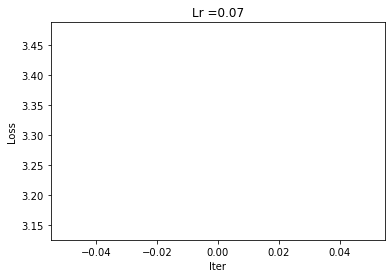

In [5]:
nn.gd(x, y, iter = 5)

In [8]:
print(dataset.shape, x.shape, y.shape, xval.shape, yval.shape)


(4, 4) (3, 4) (1, 4) (3, 4) (0, 4)


In [10]:
pred_train = nn.pred(x, y)

Z1 [[-1.46497681 -0.53297888 -0.10101077 -0.31341876]
 [-1.46497681 -0.53297888 -0.10101077 -0.31341876]]
W1 [[ 0.35084316 -0.09187644 -0.13843517]
 [ 0.35084316 -0.09187644 -0.13843517]]
b1: [[-0.06520353]
 [-0.06520353]]
A1 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Z2 [[-0.06290134 -0.06290134 -0.06290134 -0.06290134]
 [-0.06290134 -0.06290134 -0.06290134 -0.06290134]]
W2: [[0.33835072 0.33835072]
 [0.33835072 0.33835072]]
b2: [[-0.06290134]
 [-0.06290134]]
A2 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Z3 [[0.55413863 0.55413863 0.55413863 0.55413863]
 [0.55413863 0.55413863 0.55413863 0.55413863]]
W3: [[0.64550151 0.64550151]
 [0.64550151 0.64550151]]
b3: [[-0.07106812]
 [-0.07106812]]
A3 [[0.48427985 0.48427985 0.48427985 0.48427985]
 [0.48427985 0.48427985 0.48427985 0.48427985]]
Z4 [[0.78922999 0.78922999 0.78922999 0.78922999]
 [0.78922999 0.78922999 0.78922999 0.78922999]]
W4: [[0.66225034 0.66225034]
 [0.66225034 0.66225034]]
b4: [[-0.05195409]
 [-0.05195409]]
A4 [[0.63509525 0.63509525 0.63509525 0